Patrick Mireku Python assignmnent
 
# Loading the necessary packages/tools necessary to complete this assignment



In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Alphabet import SingleLetterAlphabet
import pandas as pd
import io
import requests

 # 1. Extracting the sequences
 
1. def command is used to create a function with a specific name chosen for the function.
2. sequence_data_dict = {} --> creates an empty dictionary named sequence_data_dict, where the values of the functions inside the loop will be placed.
3. SeqIO.parse(fasta_fn, "fasta"): --> Creates a loop for each record in the fasta_fn. SeqIO.parse function analyses the file in parts and returns a record object. The file name needs to be specified, along with its format (fasta, in this case).
4. description = record.description.split() --> Creates a variable called description; The record.description.split function is spliting the description stored values (identifier, description and sequence) in the record file by a space, adding each of them to a new column, and saving the output in the description variable. 
5. species_name = description[1] + " " + description[2] --> Combines the second and third elements of description (positions 2 and 3, respectively), separating them by a space, and saving them on the variable species_name. 
6. sequence_data_dict[species_name] = record.seq --> Give values for the variable created before the for loop. The sequence of each species will be pasted after its name.
7. return --> End the execution of the function call and "returns" the result. The result of this code will to be construct a dictionary with the species name and sequence, where the name is the key and the sequence is the value.
 source: https://www.python-course.eu/python3_functions.php

In [4]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

# 2. String-translate function

1. This code is used to translate DNA to aminoacids.
2. The function Codon.Table.unambiguous_dna_by_name, from Biopython, contains the unambiguous codons that are translated to specific aminoacids. The ["Vertebrate Mitochondrial"] specification says that we want to use the genetic code of the mitochondria of vertebrata.
3. An objected with length 3 is created, in order to split the DNA sequence in 3 base pairs (codons), which are translated to a aminoacid.
4. An object called codon is created, in which the results of a for loop will be placed. The for loop is using the functions range and length, along with the pre-determined object of length =3, to separada the codons.
5. An object called called aa_seq_string is created, in which an additional function will write AAs based on the codons.
6. he for loop is asking the program to delete the lost codon, which is a stop codon. The removal of the last codon is done by the "-1".
7. The result of the codon translation will be placed into the aa_seq_string object, using the mito_table.forward_table and the append functions.
8. The data is coerced to a string with the str function and the loop is terminated with the return command. 

In [5]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    n =3
    codon = [string_nucleotides[i:i+n] for i in range(0,len(string_nucleotides),n)]
    aa_seq_string=[]
    for w in range(0,len(codon)-1,1):
        aa_seq_string.append(mito_table.forward_table[codon[w]]) 
    return(str(aa_seq_string))

# 3. Alternative function

1. Biopython has a translate function, which translates DNA to aminoacids. The reference table for this function is NCBI's table, and in case we want to use a different table we need to specify it(e.g.,"Vertebrate Mitochondrial"). The argument to_stop=True makes the translation process to stop after a stop codon is found.
Information about the translate function can be found at: http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

In [6]:
from Bio.Seq import Seq
def alt_trans_function(string_nucleotides): 
    aa_seq_string = string_nucleotides.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(str(aa_seq_string))

# 4. Molecular weight of amino acid sequence

The package SEqUtils.ProtParam is loaded from Bioptython in oredr to measure milecular weight.

In [7]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    weight = analysed_seq.molecular_weight()
    return(weight)

# 5. GC content analysis

The functionused here counts the total mumber of G and C in the sequence. This is done by 
1. Creating an object(str) with the base pairs we do not want to deal with.
2. The value for loop of the G and C is retured.

In [8]:
def GC_content(sequence):
    AT = "A T"
    A = len([GC for GC in sequence if GC not in AT])
    g = A/len(sequence)
    return(g)


# 6. Main function

The package io is used to read the files and this helps to download the files directly from the internet.

In [9]:
url = "https://raw.githubusercontent.com/Paakay123/BCB546X-Fall2018/master/bears_mass.csv"
file = requests.get(url).content
bears_df1 = pd.read_csv(io.StringIO(file.decode('utf-8')))
bears_df = bears_df1.copy()
bears_df

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


In order to read the file "bears_cytb.fasta', turllib and uriretrieve is used to read directly from the internet.

In [10]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/bears_cytb.fasta', 'bears_cytb.fasta')


('bears_cytb.fasta', <http.client.HTTPMessage at 0x118e5ec18>)

The next code is to read the bears_cytb.fasta and create the directory that as specified in the first function

In [11]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")
species_list = list(bears_df.species)

# 7. Creation of two colums with  values NaN
The fucntion pandas, concat and dataframes ccould be used to create the two new columns molecular weight(Mole_weight) and GC_content.

In [12]:
pd.concat([bears_df, pd.DataFrame(columns = [ 'Mole_weight', 'GC_Content'])]) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,GC_Content,Mole_weight,mass,species
0,NaN,NaN,550.800,Ursus spelaeus
1,NaN,NaN,203.500,Ursus arctos
2,NaN,NaN,99.714,Ursus thibetanus
3,NaN,NaN,100.030,Melursus ursinus
4,NaN,NaN,110.560,Ursus americanus
5,NaN,NaN,47.020,Helarctos malayanus
6,NaN,NaN,118.200,Ailuropoda melanoleuca
7,NaN,NaN,140.700,Tremarctos ornatus
8,NaN,NaN,425.100,Ursus maritimus


# 8. Molecular weight and GC content

This loop creates the columns with their respevtive values.

In [14]:
GC_Con = [] # This is to store the iterative values created for the GC_content
Mol_Weight = [] # This is to store the iterative values created for the molecular weight

for key, value in cytb_seqs.items():  #This is to recall the dictionary per key and value
    if key in cytb_seqs: # To specify that the for loop is per each key.
        transl = alt_trans_function(cytb_seqs[key]) #Translation of the sequences in aminoacids
        weight = compute_molecular_weight(transl) # Computation of the molecular weight
        Mol_Weight.append(weight) # Creation of a list of the values of molecuar weight per key
        
        GC = GC_content(cytb_seqs[key]) # Content of GC per key
        GC_Con.append(GC) # Creation of a list of amount of GC per key

bears_df['Mole_Weight'] = Mol_Weight # Creates a new column with thevalues created in the for loop
bears_df['GC_Content'] = GC_Con # Creates a new column with thevalues created in the for loop
bears_df

,species,mass,Mole_Weight,GC_Content
0,Ursus spelaeus,550.800,42458.7992,0.437719
1,Ursus arctos,203.500,42414.7435,0.437719
2,Ursus thibetanus,99.714,42306.6735,0.456140
3,Melursus ursinus,100.030,42551.9900,0.451754
4,Ursus americanus,110.560,42427.7439,0.439474
5,Helarctos malayanus,47.020,42560.8910,0.442982
6,Ailuropoda melanoleuca,118.200,42702.1845,0.407895
7,Tremarctos ornatus,140.700,42384.8266,0.443860
8,Ursus maritimus,425.100,42454.7873,0.442982


# 9.Plotting mass vs species name

The packages would have to be imported in order to plot the graphs

In [15]:
import seaborn as sns
import numpy as np

In [16]:
%matplotlib inline

The barplot function can be used to create the graph

[Text(0,0,'Ursus spelaeus'),
 Text(0,0,'Ursus arctos'),
 Text(0,0,'Ursus thibetanus'),
 Text(0,0,'Melursus ursinus'),
 Text(0,0,'Ursus americanus'),
 Text(0,0,'Helarctos malayanus'),
 Text(0,0,'Ailuropoda melanoleuca'),
 Text(0,0,'Tremarctos ornatus'),
 Text(0,0,'Ursus maritimus')]

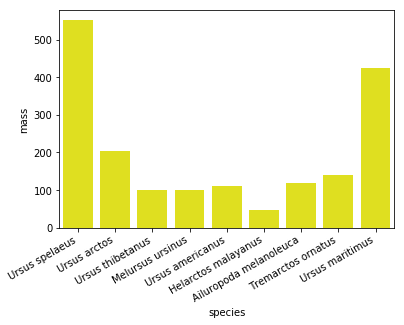

In [22]:
my_fig = sns.barplot(x = 'species', y= 'mass', hue_order='species', color = 'yellow', data = bears_df)
my_fig.set_xticklabels(labels = bears_df.species, rotation=30, horizontalalignment='right')

Q1. What is the largest bear species? 
The largest bear species is Ursus spelaeus from the bar graph


# 10. Plot molecular weight Vs GC content


/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


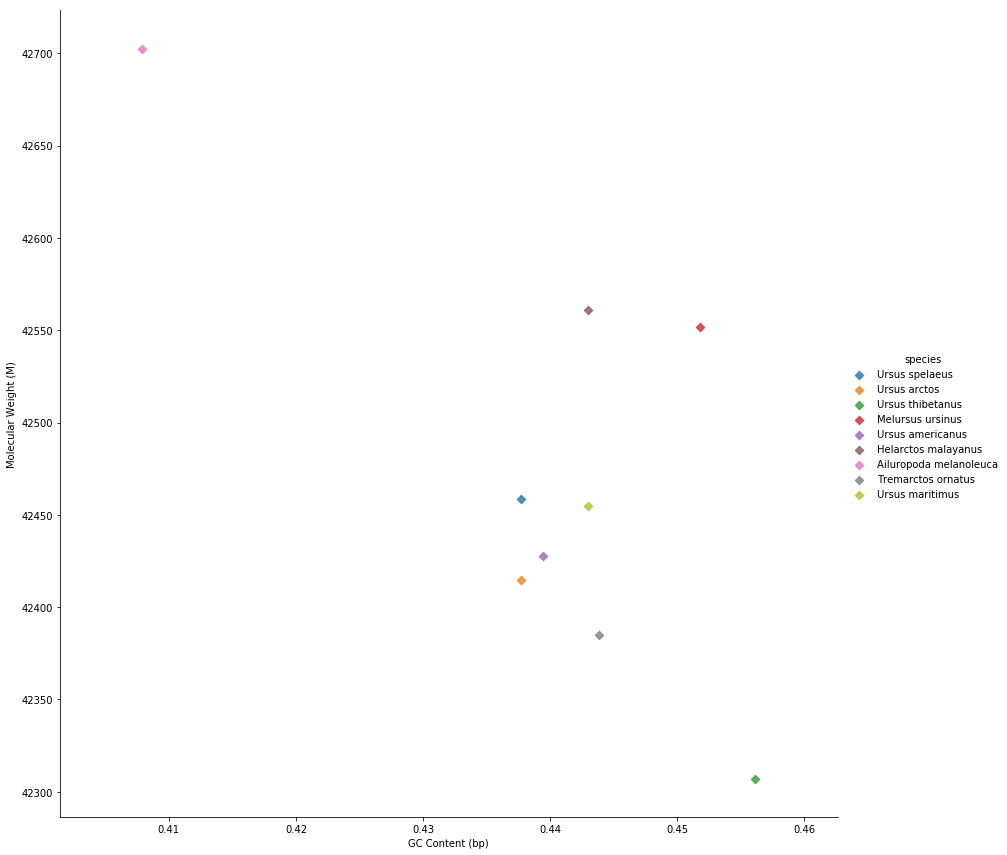

In [26]:
my_fig1 = sns.lmplot("GC_Content", "Mole_Weight", data= bears_df, fit_reg=False, size=12,hue = 'species', markers='D')
my_fig1.set_axis_labels('GC Content (bp)', 'Molecular Weight (M)')

# New Data frame
The function "to_csv" is used to export the data frame as csv

In [25]:
bears_df.to_csv('bears_mass_cytb.csv', sep=',',index=False, encoding='utf-8', )

# Bonus

1. What else can we do with this dataset in Python?
2. Add functions or anything that might be interesting and fun. (optional)

Since not all amino acids are essential, the number of essential and non-essential amino acids could be counted in each species by using the def essential function.

In [28]:
def essential(sequence):
    Non_essential = " P A T R I C K"
    return len([essen for essen in sequence if essen not in Non_essential])

 Essential amino acid could then e counted per species

In [29]:
aa_essential = []
total_aa = []
for key, value in cytb_seqs.items():  #This is to recall the dictionary per key and value
    if key in cytb_seqs: # To specify that the for loop is per each key.
        transl = alt_trans_function(cytb_seqs[key]) #Translation of the sequences in aminoacids
        count = essential(transl)
        aa_essential.append(count)
        total_aa.append(len(transl))

bears_df['Total_aa'] = total_aa # Creates a new column with thevalues created in the for loop
bears_df['Essential'] = aa_essential # Creates a new column with thevalues created in the for loop
bears_df['Non_Essential'] = bears_df['Total_aa'] - bears_df['Essential']
bears_df['%_Essential'] = bears_df['Essential']/bears_df['Total_aa']
bears_df

,species,mass,Mole_Weight,GC_Content,Total_aa,Essential,Non_Essential,%_Essential
0,Ursus spelaeus,550.800,42458.7992,0.437719,379,240,139,0.633245
1,Ursus arctos,203.500,42414.7435,0.437719,379,238,141,0.627968
2,Ursus thibetanus,99.714,42306.6735,0.456140,379,240,139,0.633245
3,Melursus ursinus,100.030,42551.9900,0.451754,379,243,136,0.641161
4,Ursus americanus,110.560,42427.7439,0.439474,379,240,139,0.633245
5,Helarctos malayanus,47.020,42560.8910,0.442982,379,242,137,0.638522
6,Ailuropoda melanoleuca,118.200,42702.1845,0.407895,379,242,137,0.638522
7,Tremarctos ornatus,140.700,42384.8266,0.443860,379,245,134,0.646438
8,Ursus maritimus,425.100,42454.7873,0.442982,379,242,137,0.638522
